In [2]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np 

### loading the data and merging the three dataframes

In [ ]:
DataV1 = pd.read_csv('../Data/avito_cars(1).csv')
DataV2 = pd.read_csv('../Data/avito_cars(2).csv')
DataV3 = pd.read_csv('../Data/avito_cars(3).csv')


In [4]:
DataSet = pd.concat([DataV1 , DataV2 , DataV3] , ignore_index=True)

In [5]:
DataSet = DataSet.rename(columns={'has_power_windows': 'prices'})
DataSet = DataSet.rename(columns={'price': 'has_power_windows'})
DataSet = DataSet.rename(columns={'prices': 'price'})

In [6]:
print(DataSet)

                                                     url  year    type_boit  \
0      https://www.avito.ma/fr/centre_ville/voitures_...  2019  Automatique   
1      https://www.avito.ma/fr/al_qods/voitures_d'occ...  2023  Automatique   
2      https://www.avito.ma/fr/autre_secteur/voitures...   NaN          NaN   
3      https://www.avito.ma/fr/aïn_diab/voitures_de_l...   NaN          NaN   
4      https://www.avito.ma/fr/ain_sebaa/voitures_d'o...  2024  Automatique   
...                                                  ...   ...          ...   
92924  https://www.avito.ma/fr/maarif/voitures_d'occa...  2017     Manuelle   
92925  https://www.avito.ma/fr/zemmouri/voitures_d'oc...  2022     Manuelle   
92926  https://www.avito.ma/fr/laâyoune/voitures_d'oc...  2013     Manuelle   
92927  https://www.avito.ma/fr/laâyoune/voitures_d'oc...  2011     Manuelle   
92928  https://www.avito.ma/fr/centre_ville/voitures_...  2001  Automatique   

      type_carburant        kilometrage       marke

#### Display the missing values in the DataSet

<Axes: >

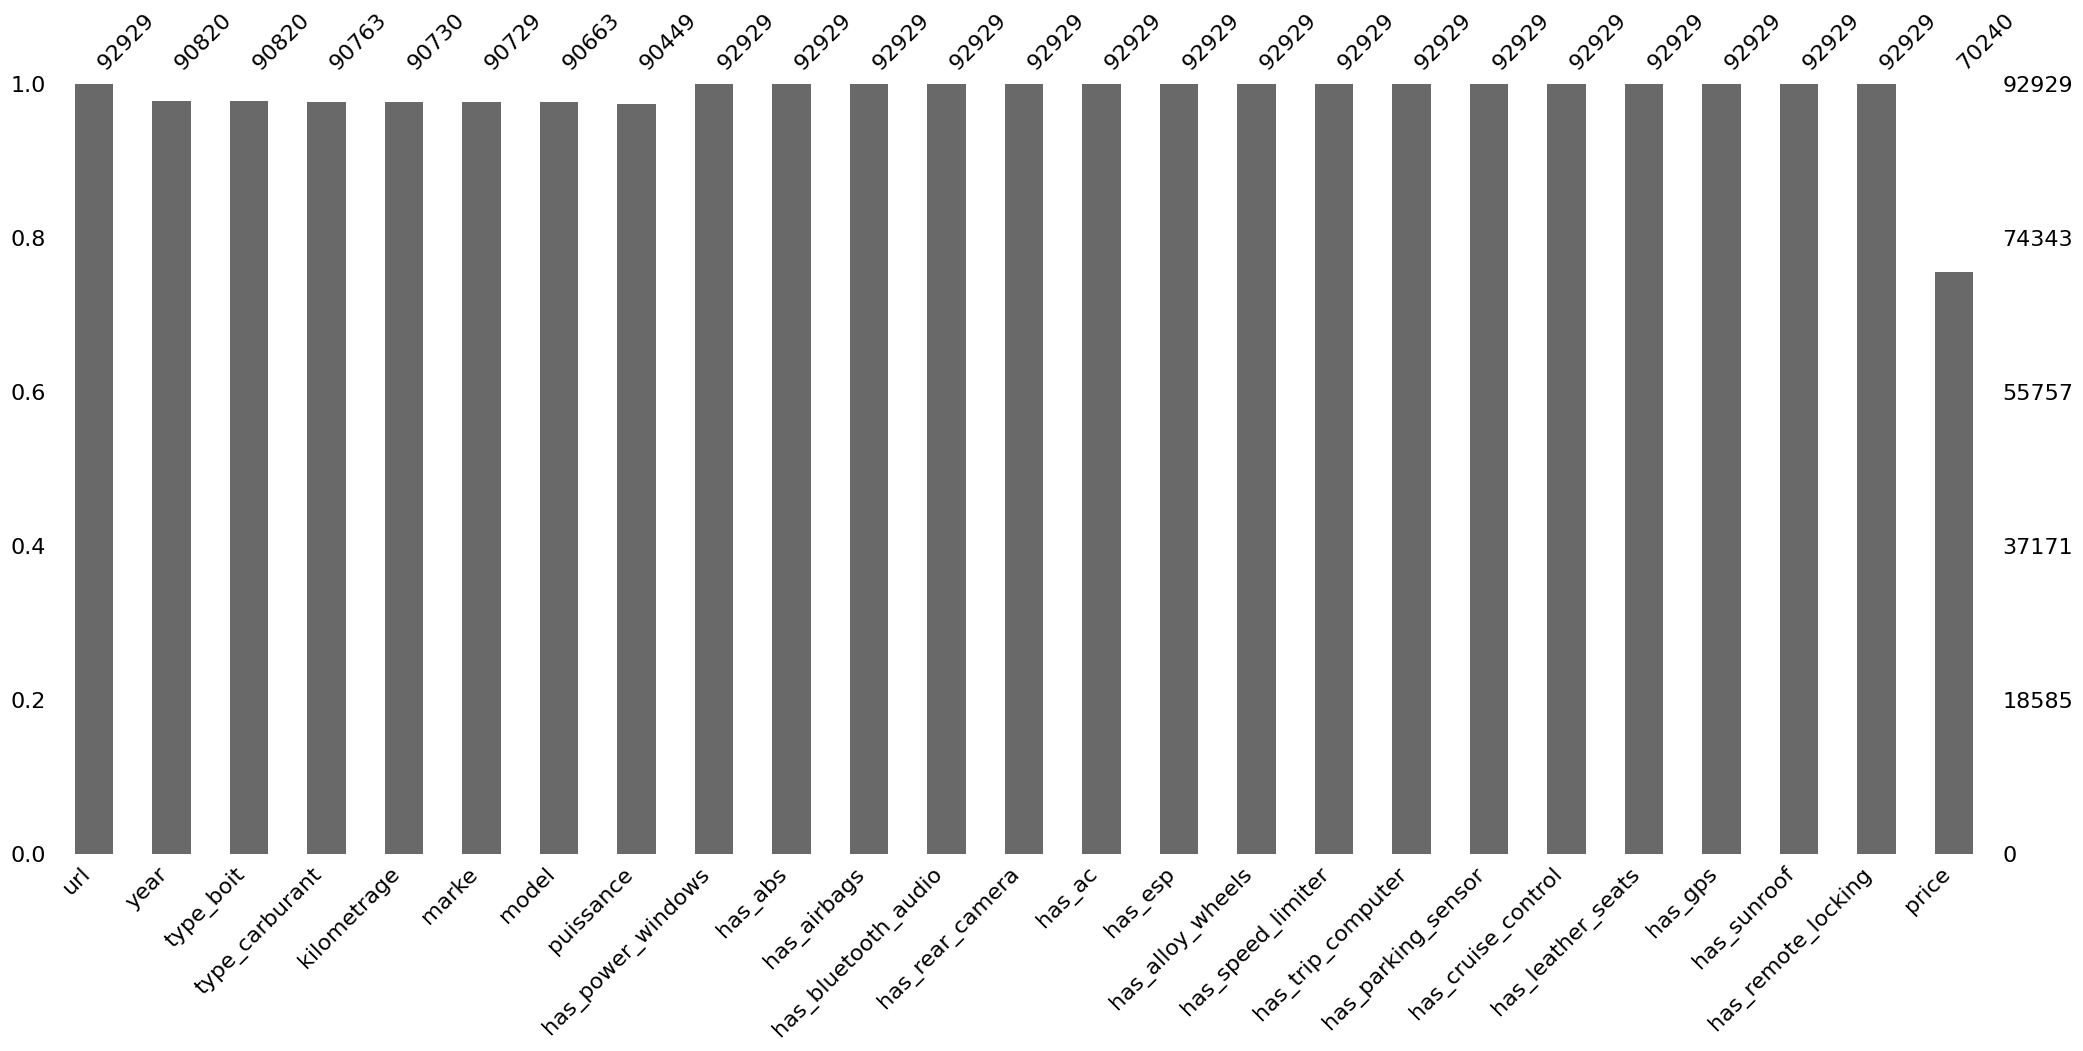

In [7]:
import missingno as msno
msno.bar(DataSet)

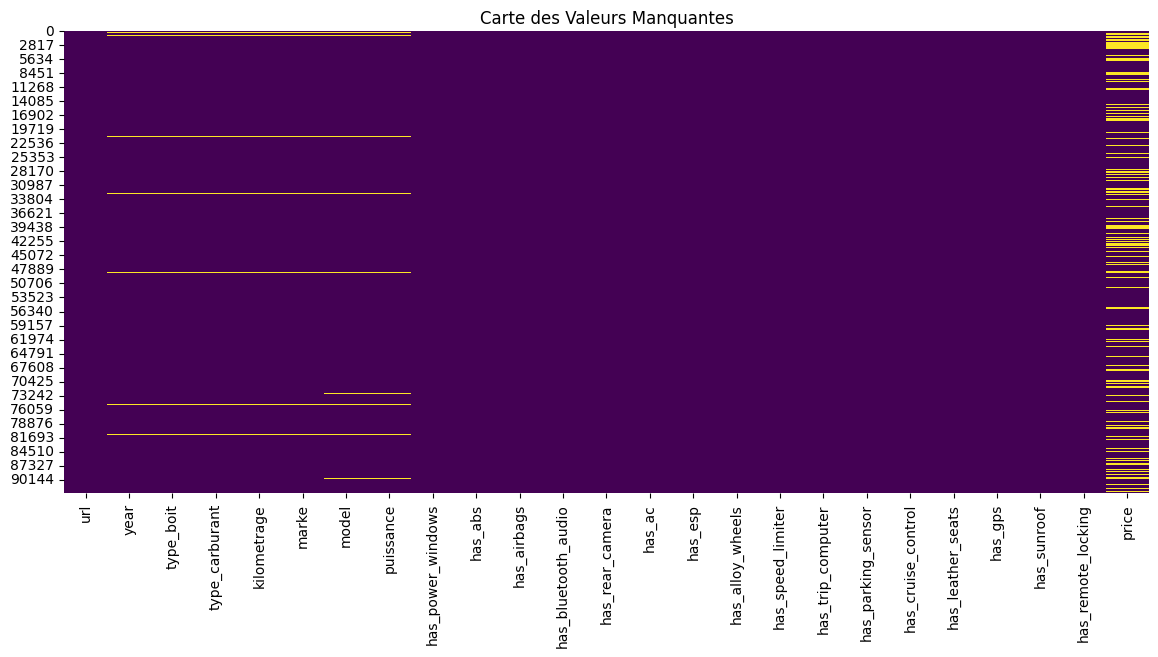

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 6))
sns.heatmap(DataSet.isnull(), cbar=False, cmap="viridis")
plt.title("Carte des Valeurs Manquantes")
plt.show()

### Remove None Values

In [9]:
DataSet = DataSet.dropna(subset=['price'])
DataSet = DataSet.dropna(subset=['type_boit'])
DataSet = DataSet.dropna(subset=['type_carburant'])
DataSet = DataSet.dropna(subset=['kilometrage'])
DataSet = DataSet.dropna(subset=['marke'])
DataSet = DataSet.dropna(subset=['model'])
DataSet = DataSet.dropna(subset=['puissance'])
DataSet = DataSet.dropna(subset=['price'])


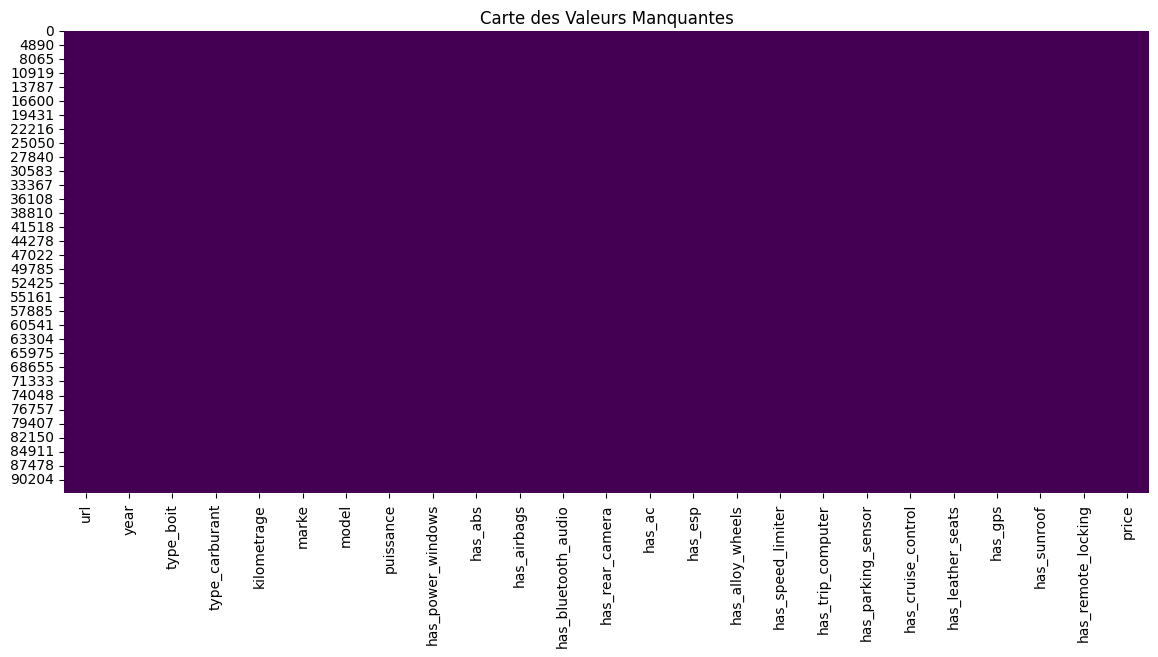

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 6))
sns.heatmap(DataSet.isnull(), cbar=False, cmap="viridis")
plt.title("Carte des Valeurs Manquantes")
plt.show()

In [11]:
print(DataSet.info())

<class 'pandas.core.frame.DataFrame'>
Index: 68160 entries, 0 to 92927
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   url                  68160 non-null  object
 1   year                 68160 non-null  object
 2   type_boit            68160 non-null  object
 3   type_carburant       68160 non-null  object
 4   kilometrage          68160 non-null  object
 5   marke                68160 non-null  object
 6   model                68160 non-null  object
 7   puissance            68160 non-null  object
 8   has_power_windows    68160 non-null  int64 
 9   has_abs              68160 non-null  int64 
 10  has_airbags          68160 non-null  int64 
 11  has_bluetooth_audio  68160 non-null  int64 
 12  has_rear_camera      68160 non-null  int64 
 13  has_ac               68160 non-null  int64 
 14  has_esp              68160 non-null  int64 
 15  has_alloy_wheels     68160 non-null  int64 
 16  has_speed

### Remove Duplicate Values

In [12]:
DataSet = DataSet.drop_duplicates(subset='url', keep='first')

In [13]:
DataSet = DataSet.reset_index()

### Cleaning Price 

In [14]:
DataSet['price'] = DataSet['price'].str.replace('DH', '', regex=False).str.replace('\u202f' , '').str.replace(' ' , '').astype(int)


### Cleaning Kilometrage

In [15]:
DataSet = DataSet[~DataSet['kilometrage'].isin(['Mitsubishi', 'BYD' , 'Skoda' , 'BMW' , 'Volvo' ,'Chevrolet', 
 'Dacia' , 'Renault'   , 'Volkswagen'  , 'Fiat' , 'Peugeot' , 'Audi' , 'Mercedes-Benz' ,     'Citroen', 
'Opel' , 'Toyota' , 'Ford'  , 'Seat' , 'Kia', 'Honda', 
'Hyundai',                 
'Mini',                    
'Land Rover' ,               
'Nissan',                  
'Alfa Romeo'                                                               
])]

In [16]:
def clean_kilometrage_column(row):
        parts = row.split('-')
        kilometrage = []
        for k in parts:
            if 'Plus de' in k:
                  k = k.replace('Plus de', '')  
            ki = k.replace(' ', '')
            ki = int(ki)
            kilometrage.append(ki)
        if(len(kilometrage)== 1) : 
              kilometrage = kilometrage[0]
              return kilometrage

        if(len(kilometrage)==2) : 
            kilometrage = (kilometrage[0]+kilometrage[1])//2
            return kilometrage

        
DataSet['kilometrage'] = DataSet['kilometrage'].apply(clean_kilometrage_column)



In [17]:
print(DataSet['kilometrage'].unique())

[ 67499 184999  17499  37499  62499 154999 124999 324999  97499 194999
  12499  77499  72499 104999 144999  92499 134999  82499  32499  42499
  27499  52499 164999  22499   2499  87499 174999  47499 114999  57499
 224999 274999   7499 424999 374999 474999 500000]


### Cleaning Puissance

In [18]:
def clean_puissance_column(row):
    if 'Plus de' in row:
            row = row.replace('Plus de', '')  
    row = row.replace('CV', '')
    row = row.replace(' ', '')
    row = int(row)
    return row
DataSet['puissance'] = DataSet['puissance'].apply(clean_puissance_column)

### Lowercase the values in this columns *[type_carburant , type_boit , marke , marke]*

In [19]:
DataSet['type_carburant'] = DataSet['type_carburant'].str.lower()


In [20]:
DataSet['type_boit'] = DataSet['type_boit'].str.lower()


In [21]:
DataSet['marke'] = DataSet['marke'].str.lower()


In [22]:
DataSet['model'] = DataSet['model'].str.lower()


### Cleaning Year

In [23]:
DataSet['year'] = DataSet['year'].str.replace(' ou plus ancien' , '').astype(int)
print(DataSet['year'].unique())

[2019 2023 2024 2021 2014 2004 2013 2016 2018 2009 1997 2022 2017 2007
 2020 2011 2012 2015 2008 2010 1990 2025 1980 1998 2002 2006 1983 1987
 2005 2003 1984 1989 1992 2001 1985 1986 1993 2000 1996 1991 1995 1982
 1999 1994 1988 1981]


### Detection and Remove outliers

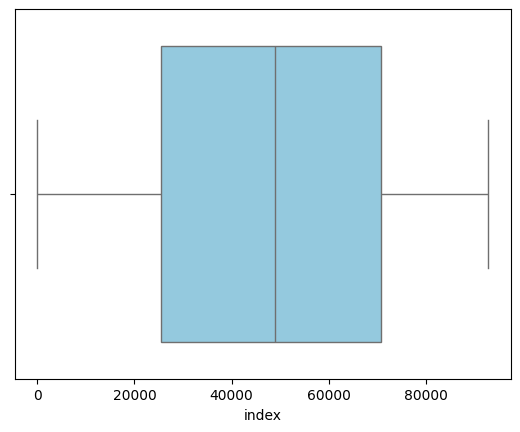

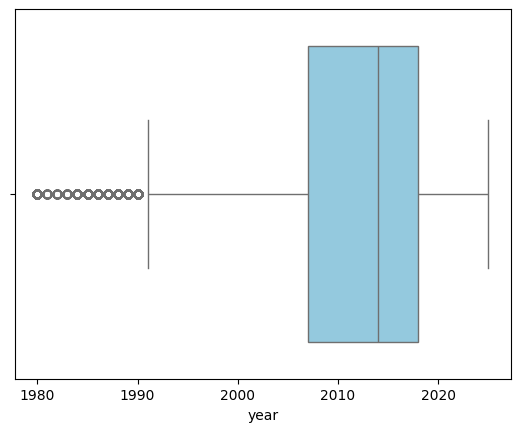

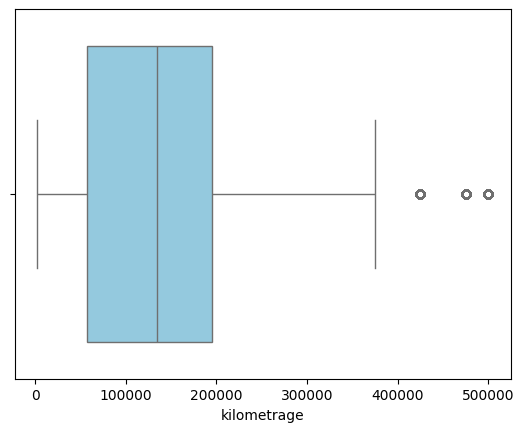

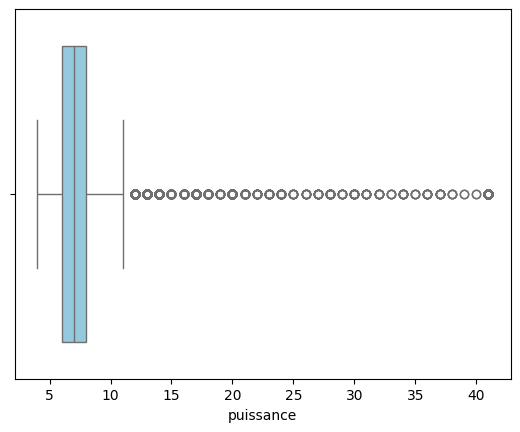

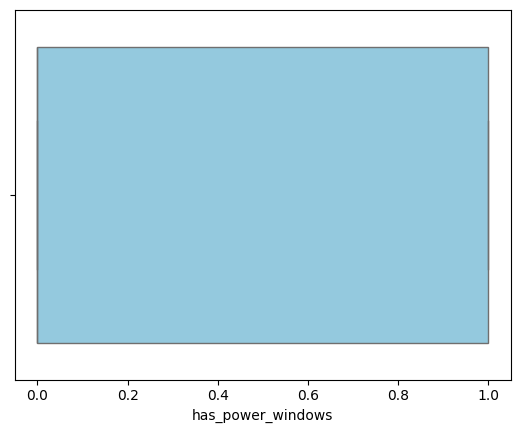

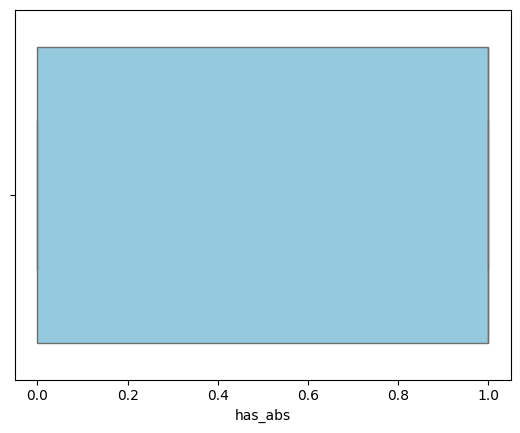

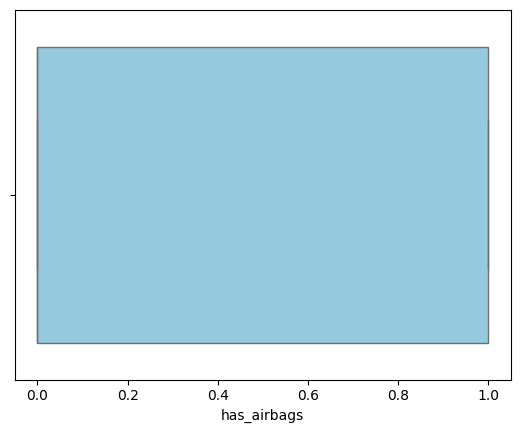

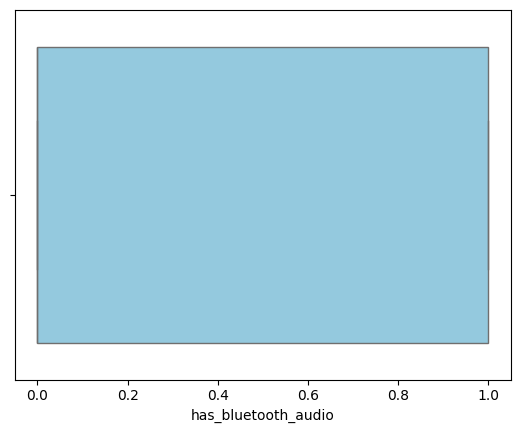

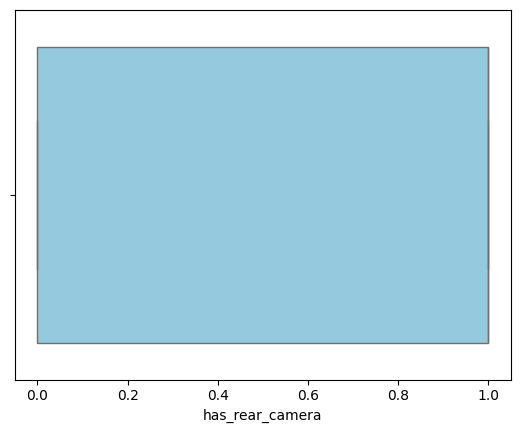

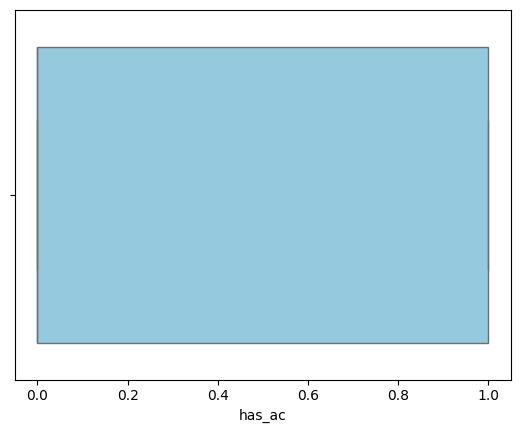

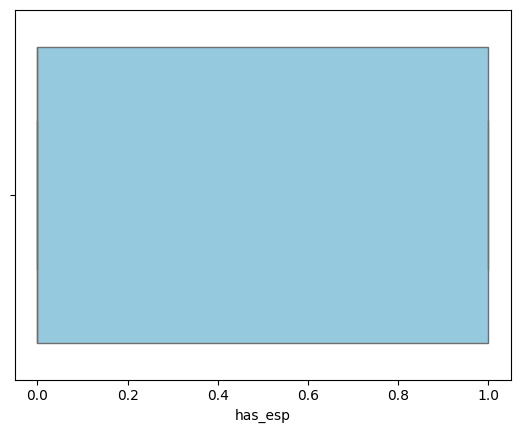

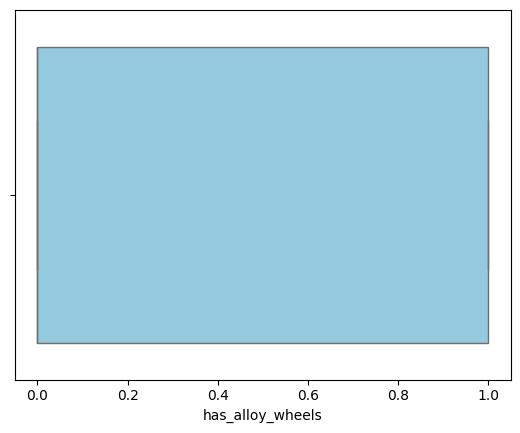

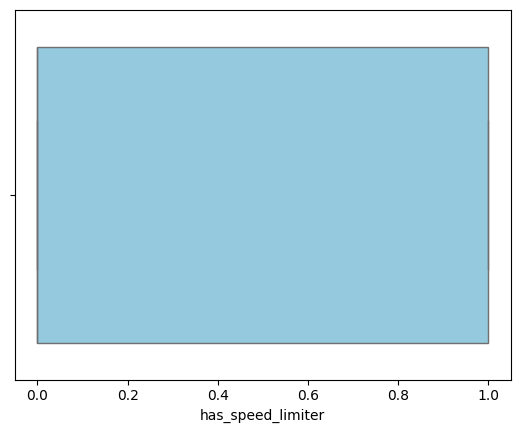

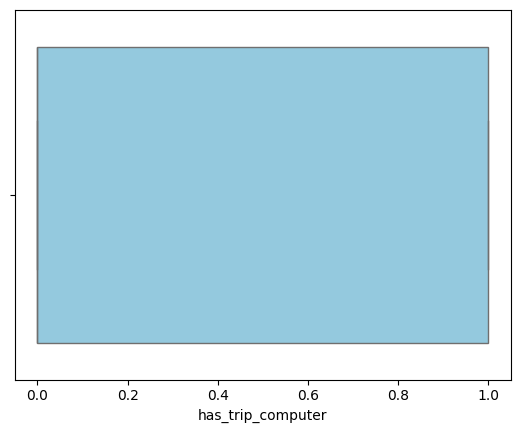

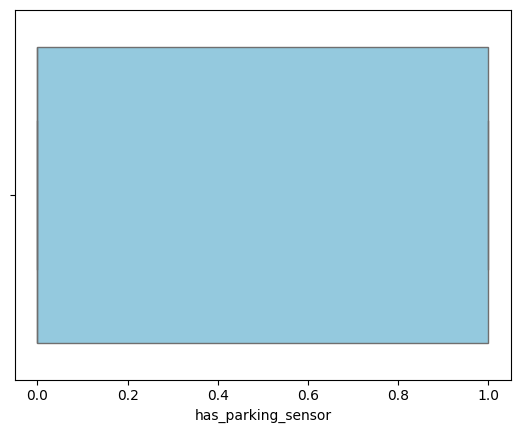

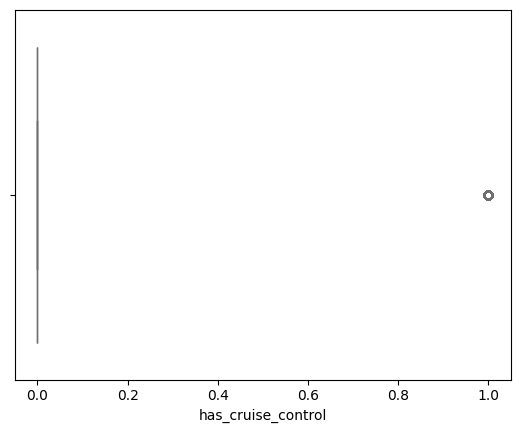

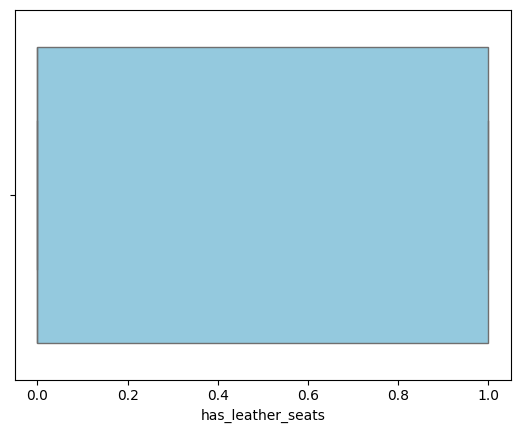

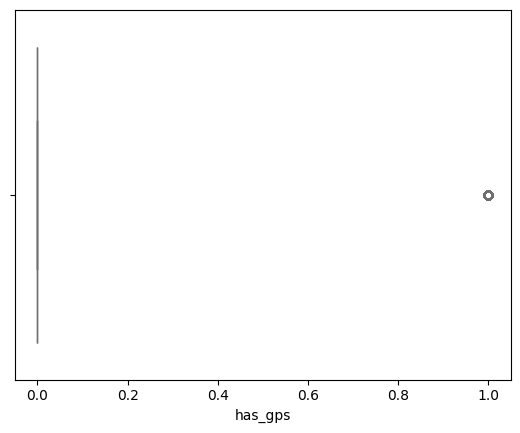

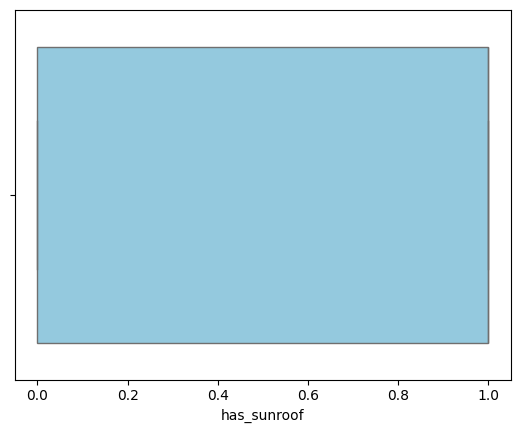

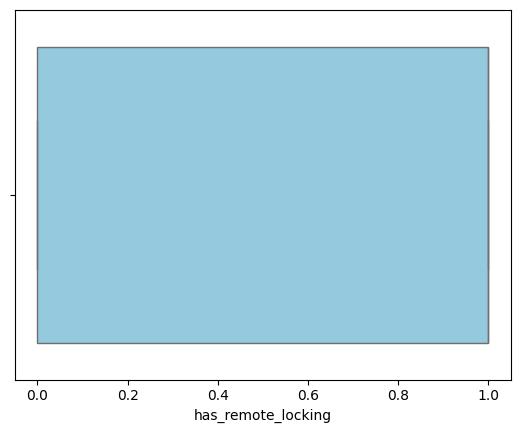

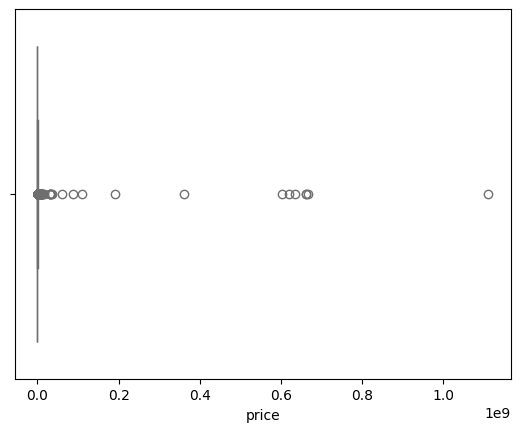

In [24]:
col = DataSet.select_dtypes(exclude='object').columns
for i in col:
    sns.boxplot(DataSet[i], orient='h', color='skyblue')
    plt.show()

In [25]:
from scipy import stats
def detect_outliers(df, column):

    z_scores = stats.zscore(df[column])
    threshold = 3
    outliers = df[np.abs(z_scores) > threshold][column]
    return outliers

def remove_outliers(df, column):
    z_scores = stats.zscore(df[column])
    threshold = 3
    new_df = df[np.abs(z_scores) < threshold]
    return new_df

In [26]:
# Detection des outliers 
columns = DataSet.select_dtypes(include=['int', 'float']).columns
for i in columns:
    out = detect_outliers(DataSet, i)
    print(out)

Series([], Name: index, dtype: int64)
163      1980
483      1983
590      1984
796      1985
799      1980
         ... 
64092    1981
64118    1984
64624    1981
64891    1985
64993    1985
Name: year, Length: 581, dtype: int64
509      474999
634      474999
1296     500000
1618     474999
1926     500000
          ...  
64969    474999
64982    474999
64993    500000
65004    500000
65066    500000
Name: kilometrage, Length: 956, dtype: int64
16       17
18       23
20       17
120      17
161      17
         ..
64600    18
64655    20
64835    22
64888    41
64963    22
Name: puissance, Length: 689, dtype: int64
Series([], Name: has_power_windows, dtype: int64)
Series([], Name: has_abs, dtype: int64)
Series([], Name: has_airbags, dtype: int64)
Series([], Name: has_bluetooth_audio, dtype: int64)
Series([], Name: has_rear_camera, dtype: int64)
Series([], Name: has_ac, dtype: int64)
Series([], Name: has_esp, dtype: int64)
Series([], Name: has_alloy_wheels, dtype: int64)
Series([], N

In [27]:
DataSet = DataSet[DataSet['price'] >= 25000]
DataSet = DataSet[DataSet['price'] <= 500000]

# Suppression des outliers
columns = DataSet.select_dtypes(include=['int', 'float']).columns
for i in columns:
    DataSet = remove_outliers(DataSet, i)




## Save Data

In [ ]:
DataSet.to_csv('../Data/CleanData.csv', index=False)

In [29]:
print(DataSet.shape)

(58751, 26)
